<a href="https://colab.research.google.com/github/Taiba528/My-Python-World/blob/master/TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import generic libraries
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import pandas as pd
import numpy
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,module="pandas", lineno=570)

In [0]:
#Topic modeling with clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

In [3]:
#Topic modeling with SVD
from sklearn.decomposition import TruncatedSVD
example = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [4]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['cool',
 'data',
 'football',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [5]:
# Fit LSA. Use algorithm = “randomized” for large datasets
#lsa = TruncatedSVD(2, algorithm = 'arpack')
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.280004,0.035353,0.033417,0.223993,0.178307,0.338085,0.004555,0.338085,0.391281,0.035353,0.038169,0.672310,0.028861
component_2,0.365270,-0.064548,-0.298349,-0.168056,-0.478428,-0.366379,-0.082792,-0.366379,0.001036,-0.064548,0.101363,0.424306,-0.215557


In [6]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"])

,component_1,component_2
Machine learning is super fun,0.957024,-0.290007
"Python is super, super cool",0.856484,0.516174
"Statistics is cool, too",0.563355,0.826215
Data science is fun,0.704171,-0.710030
Python is great for machine learning,0.717284,-0.696781
I like football,0.099136,-0.995074
Football is great to watch,0.235618,-0.971846


In [0]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Plot of points against LSA principal components')

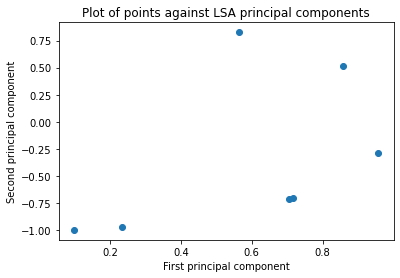

In [8]:
#Visualize the points on the orthogonal plot
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')

In [9]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
df  = pd.DataFrame(similarity,index=example, columns=example).head(10)
df

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.669981,0.299536,0.879823,0.888530,0.383455,0.507335
"Python is super, super cool",0.669981,1.000000,0.908975,0.236612,0.254682,-0.428723,-0.299838
"Statistics is cool, too",0.299536,0.908975,1.000000,-0.189940,-0.171606,-0.766296,-0.670217
Data science is fun,0.879823,0.236612,-0.189940,1.000000,0.999826,0.776342,0.855956
Python is great for machine learning,0.888530,0.254682,-0.171606,0.999826,1.000000,0.764458,0.846169
I like football,0.383455,-0.428723,-0.766296,0.776342,0.764458,1.000000,0.990417
Football is great to watch,0.507335,-0.299838,-0.670217,0.855956,0.846169,0.990417,1.000000


In [10]:
# Clustering the training 30 sentences with K-means technique
modelkmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
for doc in dtm:
    print(modelkmeans.predict(doc))

[0]
[0]
[1]
[1]
[0]
[1]
[1]
